In [2]:
import sys
from os import path

if __package__ is None:
    #print("__package__ is None") 
    print(path.dirname( path.dirname( path.abspath('__file__') ) ))
    sys.path.append(path.dirname( path.dirname( path.abspath("__file__") ) ))
from Jutils import display_video

import mujoco_py
import copy
import os
import itertools
from IPython.display import clear_output, display, Image, HTML
import numpy as np
# Graphics-related
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import PIL.Image

/home/yspark/Examples_Mujoco


In [6]:
# Setting camera distance, angles

def set_cam(env, config) :
    env.viewer.cam.distance = config['distance']
    env.viewer.cam.azimuth = config['azimuth'] # angle for horizontal
    env.viewer.cam.elevation = config['elevation'] # angle for vertical

    #env.viewer.move_camera(pos[0],pos[1],pos[2]) # move_camera에 들어가는 (?,?,?) parameter가 각각 뭘 뜻하는지 모르겠음. 주의할점 : 0이나 음수 값 넣으면 무한루프돌음
    # move_camera(action, dx / height, dy / height) # mujoco_py.MjViewer (move_camera로 pos정하는거 아닌가?)

# Setting camera pos : env.move_camera

## Multi-Rendering

In [ ]:
'''
env : env
cam_configs : configs for different angle
shape : (n,m) 모양 
'''

def render_multi_angle(env, cam_configs, shape) :
    if shape[0]*shape[1] != len(cam_configs):
        raise Exception('It cannot be expressed in entered array.')
    
    # 띄우기
    size = 300
    height_blank = np.array([[[255, 255, 255] for i in range(10)] for j in range(size)]) 
    width_blank = np.array([[[255, 255, 255] for i in range(size*shape[1] + 10*(shape[1]+1))] for j in range(10)])

    pixel = width_blank
    idx = 0

    for i in range(shape[0]): # 행
        pixel_temp = height_blank
        for j in range(shape[1]): # 열
            set_cam(env, cam_configs[idx])
            idx += 1
            pixel_temp = np.hstack([pixel_temp, env.render(mode='rgb_array', width=size, height=size).copy()]) # 옆으로 붙이기
            pixel_temp = np.hstack([pixel_temp, height_blank])
        pixel = np.vstack([pixel, pixel_temp]) # 위로 붙이기
        pixel = np.vstack([pixel, width_blank])

    return pixel

# Examples

## FetchPickAndPlace

In [ ]:
import custom_gym as cg

env_name = 'FetchPickAndPlace-v1'
env = cg.make(env_name) # Initalize with 'AntAndFetch-v1' - embedded in Gym
env.reset()

cam_config_1 = {'distance' : 2.5, 'azimuth' : 132.0, 'elevation' : -14.0}
cam_config_2 = {'distance' : 2.5, 'azimuth' : 64.0, 'elevation' : -14.0}
#env.viewer.move_camera()

video_1 = []
for i in range(20):
    obs, reward, done, info = env.step(env.action_space.sample()) # take a random action
    pixels = env.render(mode='rgb_array')
    set_cam(env, cam_config_1)
    env.viewer.move_camera(1,-0.05*i, 0) # move_camera(action, dx / height, dy / height)
    video_1.append(env.render(mode='rgb_array').copy())

env.close()
print("Createing Video..")
display_video(video_1, gif=True)

# Ant
- FetchAnt가 Custom_env를 상속받도록
- Custom_env는 Mujoco_env(Ant model)와 Robot_env(Fetch model)를 둘 다 움직일 수 있도록 하는 새로운 env (실패.. ing..)

Createing Video..


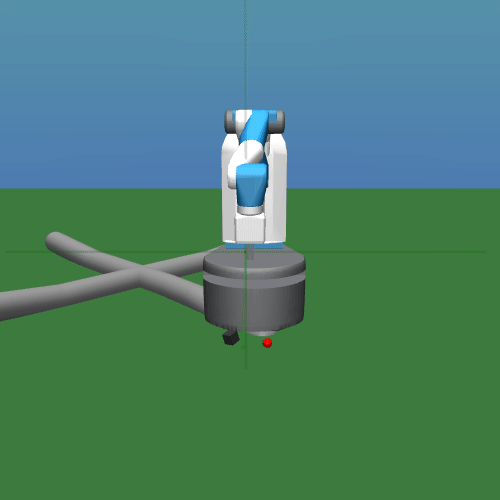

In [46]:
import custom_gym as cg

env_name = 'FetchAnt-v1'
env = cg.make(env_name) # Initalize with 'FetchAnt-v1' - embedded in Gym
env.reset()

cam_config_1 = {'distance' : 2.5, 'azimuth' : 180.0, 'elevation' : -14.0}
cam_config_2 = {'distance' : 2.5, 'azimuth' : 64.0, 'elevation' : -14.0}
#env.viewer.move_camera()

video_1 = []
for i in range(50):
    obs, reward, done, info = env.step(env.action_space.sample()) # take a random action
    pixels = env.render(mode='rgb_array')
    set_cam(env, cam_config_1)
    env.viewer.move_camera(1,-0.01*i, 0) # move_camera(action, dx / height, dy / height)
    video_1.append(env.render(mode='rgb_array').copy())

env.close()
print("Createing Video..")
display_video(video_1, gif=True)